<a href="https://colab.research.google.com/github/AbhimanyuDeswal/Handwritten-Digit-Recognition/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Modules


In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

Unzip the data

In [4]:
!unzip Train_UQcUa52.zip

Streaming output truncated to the last 5000 lines.
 extracting: Images/train/55.png     
 extracting: Images/train/550.png    
 extracting: Images/train/5500.png   
 extracting: Images/train/5501.png   
 extracting: Images/train/5502.png   
 extracting: Images/train/5503.png   
 extracting: Images/train/5504.png   
 extracting: Images/train/5505.png   
 extracting: Images/train/5506.png   
 extracting: Images/train/5507.png   
 extracting: Images/train/5508.png   
 extracting: Images/train/5509.png   
 extracting: Images/train/551.png    
 extracting: Images/train/5510.png   
 extracting: Images/train/5511.png   
 extracting: Images/train/5512.png   
 extracting: Images/train/5513.png   
 extracting: Images/train/5514.png   
 extracting: Images/train/5515.png   
 extracting: Images/train/5516.png   
 extracting: Images/train/5517.png   
 extracting: Images/train/5518.png   
 extracting: Images/train/5519.png   
 extracting: Images/train/552.png    
 extracting: Images/train/5520.png   

Load the data

In [5]:
df = pd.read_csv('train.csv')
df.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [6]:
image_path = 'Images/train/'

In [7]:
X = np.array([img_to_array(load_img(image_path+df['filename'][i], target_size=(28,28,1), grayscale=True))
              for i in tqdm(range(df.shape[0]))
              ]).astype('float32')

  0%|          | 0/49000 [00:00<?, ?it/s]

In [8]:
y = df['label']

In [9]:
print(X.shape, y.shape)

(49000, 28, 28, 1) (49000,)


1


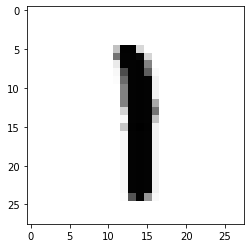

In [10]:
image_index = 2
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

2


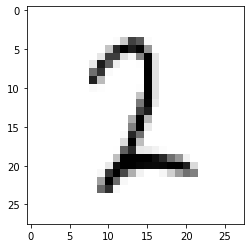

In [11]:
image_index = 10
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

7


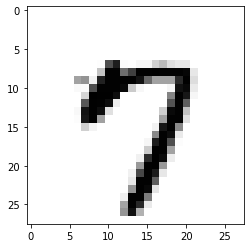

In [12]:
image_index = 100
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

Train test split

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=np.array(y))

Normalization

In [14]:
x_train[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [15]:
x_train /= 255
x_test /= 255

In [16]:
input_shape = (28,28,1)
output_class = 10

Model Creation

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# define the model
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(output_class, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
# train the model
model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
1149/1149 [==============================] - 25s 21ms/step - loss: 0.2878 - accuracy: 0.9125 - val_loss: 0.1281 - val_accuracy: 0.9628
Epoch 2/30
1149/1149 [==============================] - 24s 21ms/step - loss: 0.1235 - accuracy: 0.9608 - val_loss: 0.0919 - val_accuracy: 0.9733
Epoch 3/30
1149/1149 [==============================] - 24s 21ms/step - loss: 0.0872 - accuracy: 0.9737 - val_loss: 0.0768 - val_accuracy: 0.9776
Epoch 4/30
1149/1149 [==============================] - 24s 21ms/step - loss: 0.0660 - accuracy: 0.9788 - val_loss: 0.0661 - val_accuracy: 0.9804
Epoch 5/30
1149/1149 [==============================] - 24s 21ms/step - loss: 0.0551 - accuracy: 0.9824 - val_loss: 0.0669 - val_accuracy: 0.9804
Epoch 6/30
1149/1149 [==============================] - 24s 20ms/step - loss: 0.0451 - accuracy: 0.9856 - val_loss: 0.0712 - val_accuracy: 0.9815
Epoch 7/30
1149/1149 [==============================] - 23s 20ms/step - loss: 0.0412 - accuracy: 0.9860 - val_loss: 0.0616 -

Testing the model

Predicted output: 6


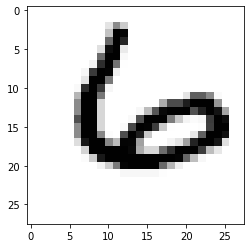

In [20]:
image_index = 80
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())

Predicted output: 4


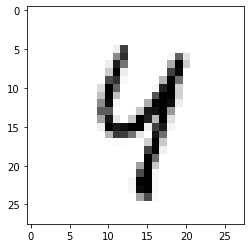

In [22]:
image_index = 15
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())